## 3.1 선형회귀

1. 데이터 전처리, ** 중요 딥러닝 모델의 입력 shape와 출력 shape를 확인
2. 데이터셋 클래스 작성
3. 데이터셋 인스턴스를 활용해서 데이터 로더 할당
4. 딥러닝 모델 작성
5. 순전파 함수를 정의
6. 손실함수 정의
7. 최적화 기법 설정
8. 하이퍼 파라미터를 설정
9. 학습, 검증 시행
10. 테스트 데이터로 추론

In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

from torch.utils.data import DataLoader # 데이터로더
from torch.utils.data import Dataset

In [2]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cpu


## 옵티마이저 

In [80]:
optimaizer = optim.SGD(model.parameters(), lr=learning_rate)
optimaizer = optim.Adam(model.parameters(), lr=learning_rate)
# optimizer를 설정하기 위해서는 모델의 파라미터, lr이 필요하다

NameError: name 'model' is not defined

## 손실함수

In [81]:
# 손실함수를 정의
bce_loss = nn.BCELoss()
ce_loss = nn.CrossEntropyLoss()
mse_loss = nn.MSELoss()

In [5]:
# 모델이 있고 예측값이 나왔다고 가정
y_hat = torch.tensor([1.1,2.4,3.1])
y_target = torch.tensor([1,2,3])
# 간단하게 로스 함수의 입력에 타깃 데이토와 예측 값을 넣으면 로스가 계산된다.
loss1 = mse_loss(y_hat,y_target)
print(loss1)

tensor(0.0600)


In [11]:
torch.manual_seed(1)
output = torch.rand([4,10]) # 2x10 행렬을 생성합니다. 2는 데이터의 수, 10은 클레스의 수
target = torch.LongTensor([1,9,2,3]) # 1과 9는 실제 정답
loss2 = ce_loss(output, target)
print(loss2)

tensor(2.4982)


In [104]:
# binary cross entropy
torch.manual_seed(1)
sigmoid = nn.Sigmoid()
inp = torch.randn(3)
y_pred = sigmoid(inp)
target = torch.empty(3).random_(2)

loss1 = bce_loss(y_pred,target)
print(inp, y_pred, target, loss1,sep='\n')

tensor([0.6614, 0.2669, 0.0617])
tensor([0.6596, 0.5663, 0.5154])
tensor([1., 0., 0.])
tensor(0.6587)


## 선형회귀

In [116]:
# nn 모듈에는 머신러닝_딥러닝 모델을 구축하기 위해 필요한 모든 요소가 군현되어 있따.
# 우리는 이것들을 잘 가져다 쓰기만 하면 된다.

# y = wx + b

linear_model = nn.Linear(1,1) # 첫번째 인자 : 입력의 차원, 두번째 인자 : 출력의 차원

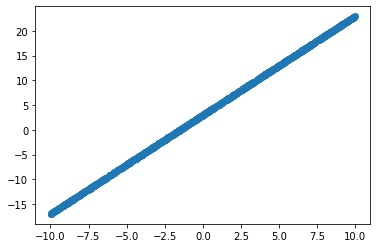

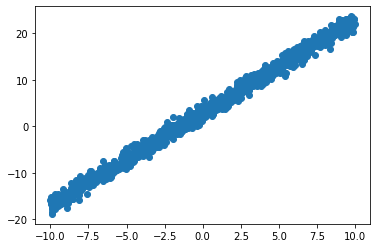

In [119]:
# 선형회귀 데이터 생성
num_data = 1000

# torch.init_num_threads
# init 모듈은 가중치나 텐서 데이터들의 분포를 초기화할 때 사용합니다.
x = init.uniform_(torch.Tensor(num_data,1), -10,10) # 첫번째 인자 : 텐서 shape, 두번째, 세번째: 범위
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
y = 2*x +3
y_noise = y+noise

optimizer = optim.SGD(linear_model.parameters(), lr=0.001)
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()
plt.scatter(x,y_noise)
plt.show()

In [17]:
print(linear_model.weight, linear_model.bias, linear_model.weight.grad,linear_model.bias.grad,sep='\n')
# grad = tape.gradient(loss, my_vars

Parameter containing:
tensor([[0.0493]], requires_grad=True)
Parameter containing:
tensor([0.3652], requires_grad=True)
None
None


## 지도학습 모델의 학습 순서  

1) 옵티마이저의 그래디언트를 0으로 
2) 데이터를 모델에 넣어서 값을 예측한다.
3) 정답 데이터와 예측값을 통해 손실함수를 계산한다.
4) 지농미분함수인 .backward()를 이용해 그래디언트를 계산한다.
5) 옵티마이저의 step()함수를 호출한다.

In [120]:
num_epochs = 1000
for i in range(num_epochs):
    optimizer.zero_grad()
    y_pred = linear_model(x)
    loss = mse_loss(y_pred, target)
    loss.backward() # 4
    optimizer.step() # 5
    if i % 10 == 0:
        print(loss.data)

tensor(26.5740)
tensor(7.0104)
tensor(2.2222)
tensor(1.0403)
tensor(0.7390)
tensor(0.6530)
tensor(0.6201)
tensor(0.6006)
tensor(0.5849)
tensor(0.5704)
tensor(0.5567)
tensor(0.5436)
tensor(0.5310)
tensor(0.5190)
tensor(0.5073)
tensor(0.4962)
tensor(0.4854)
tensor(0.4751)
tensor(0.4652)
tensor(0.4557)
tensor(0.4466)
tensor(0.4378)
tensor(0.4294)
tensor(0.4213)
tensor(0.4135)
tensor(0.4060)
tensor(0.3988)
tensor(0.3919)
tensor(0.3852)
tensor(0.3788)
tensor(0.3727)
tensor(0.3668)
tensor(0.3612)
tensor(0.3557)
tensor(0.3505)
tensor(0.3455)
tensor(0.3406)
tensor(0.3360)
tensor(0.3316)
tensor(0.3273)
tensor(0.3232)
tensor(0.3192)
tensor(0.3154)
tensor(0.3118)
tensor(0.3083)
tensor(0.3049)
tensor(0.3017)
tensor(0.2985)
tensor(0.2956)
tensor(0.2927)
tensor(0.2899)
tensor(0.2873)
tensor(0.2847)
tensor(0.2823)
tensor(0.2799)
tensor(0.2777)
tensor(0.2755)
tensor(0.2734)
tensor(0.2714)
tensor(0.2695)
tensor(0.2676)
tensor(0.2659)
tensor(0.2641)
tensor(0.2625)
tensor(0.2609)
tensor(0.2594)
tensor(0.

In [30]:
print(linear_model.weight, linear_model.bias, linear_model.weight.grad,linear_model.bias.grad,sep='\n')
optimaizer.zero_grad()
print(linear_model.weight.grad,linear_model.bias.grad)

Parameter containing:
tensor([[-1.0346e-05]], requires_grad=True)
Parameter containing:
tensor([0.3376], requires_grad=True)
tensor([[0.]])
tensor([0.])
tensor([[0.]]) tensor([0.])


# 퀴즈 (Easy)  
위 모델은 y = 2x + 3 으로 학습되지 않았습니다.  
이를 개선하기 위해서는 하이퍼 파라미터를 조정해야 합니다.  
1) 위 선형회귀모델에서 하이퍼파라미터의 종류는 뭐가 있을까요?  
2) 하이퍼파라미터를 조정해서 모델의 가중치와 편향이 정답에 가깝도록 학습시켜보세요

## 3.2 다중선형회귀

In [127]:
# 선형회귀 데이터 생성
num_data = 1000

x = init.uniform_(torch.Tensor(num_data, 3), -10, 10) # 첫번째 인자 : 텐서 shape, 두번째
noise = init.normal_(torch.FloatTensor(num_data,1), std=1)
weights = torch.tensor([2.,3.,1.])
y = x.matmul(weights) + -1
y = y.unsqueeze(1)
y_noise = y + noise
print(f"y_shape : {noise.shape}")
# print(y)
# print(y_noise)
# num_data = 1000
# num_epoch = 2000

# x = init.uniform_(torch.Tensor(10, 3), -10, 10)
# noise = init.normal_(torch.FloatTensor(10, 1), std=1)
# weights = torch.tensor([2., 3., 1.])
# print(x.matmul(weights).shape)
# y = x.matmul(weights) + -1
# y = y.unsqueeze(1)
# print(f"y.shape {y.shape}")
# y_noise = y + noise

y_shape : torch.Size([1000, 1])


In [ ]:
multi_model = nn.Linear(3,1)
optimaizer = optim.SGD(multi_model.parameters(), lr=0.001)


$${y = w_1 x_1 + w_2 x_2 + w_3 x_3 + b}$$

In [32]:
num_epochs = 1000
for i in range(num_epochs):
    optimaizer.zero_grad()
    y_pred = linear_model(x)
    loss = mse_loss(y_pred, target)
    loss.backward() # 4
    optimaizer.step() # 5
    if i % 10 == 0:
        print(loss.data)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1000x3 and 1x1)

# 퀴즈 (Easy)  
1) 하이퍼파라미터를 조정해서 모델의 가중치와 편향이 정답에 가깝도록 학습시켜보세요

## 3.3 로지스틱 회귀

In [38]:
x_data = [[0, 2], [1, 2], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [39]:
linear_model = nn.Linear(2,1)
sigmoid = nn.Sigmoid()
optimizer = optim.SGD(linear_model.parameters(), lr=0.001)

In [56]:
num_epochs = 1000
for i in range(num_epochs):
    optimizer.zero_grad() # 1
    y_pred = sigmoid(linear_model(x_train)) # 2
    loss = bce_loss(y_pred, y_train) #3
    loss.backward() # 4
    optimizer.step() # 5

    if i % 10 == 0:
        print(loss.data)

tensor(0.3458)
tensor(0.3457)
tensor(0.3456)
tensor(0.3455)
tensor(0.3455)
tensor(0.3454)
tensor(0.3453)
tensor(0.3452)
tensor(0.3452)
tensor(0.3451)
tensor(0.3450)
tensor(0.3449)
tensor(0.3449)
tensor(0.3448)
tensor(0.3447)
tensor(0.3446)
tensor(0.3446)
tensor(0.3445)
tensor(0.3444)
tensor(0.3443)
tensor(0.3443)
tensor(0.3442)
tensor(0.3441)
tensor(0.3440)
tensor(0.3440)
tensor(0.3439)
tensor(0.3438)
tensor(0.3437)
tensor(0.3437)
tensor(0.3436)
tensor(0.3435)
tensor(0.3435)
tensor(0.3434)
tensor(0.3433)
tensor(0.3432)
tensor(0.3432)
tensor(0.3431)
tensor(0.3430)
tensor(0.3429)
tensor(0.3429)
tensor(0.3428)
tensor(0.3427)
tensor(0.3426)
tensor(0.3426)
tensor(0.3425)
tensor(0.3424)
tensor(0.3423)
tensor(0.3423)
tensor(0.3422)
tensor(0.3421)
tensor(0.3421)
tensor(0.3420)
tensor(0.3419)
tensor(0.3418)
tensor(0.3418)
tensor(0.3417)
tensor(0.3416)
tensor(0.3415)
tensor(0.3415)
tensor(0.3414)
tensor(0.3413)
tensor(0.3412)
tensor(0.3412)
tensor(0.3411)
tensor(0.3410)
tensor(0.3410)
tensor(0.3

## 3.4 클래스를 통한 회귀 모델 구현

In [148]:
class LinearRegression(nn.Module):
    def __init__(self):
        # 부모클래스인 nn.Module의 생성자를 먼저 호출한다.
        super(LinearRegression, self).__init__()
        self.linear_layer = nn.Linear(1,1)

    def forward(self, x):
        # 순전파 함수: 입력값 x를 생성자에 정의된 레이어에 넣어서 값을 예측한다.
        return self.linear_layer(x)


class MultiRegression(nn.Module):
    def __init__(self):
        super(MultiRegression, self).__init__()
        self.multi_layer = nn.Linear(3,1)

    def forward(self, x):
        return self.multi_layer(x)

# 퀴즈: 로지스틱 회귀 모델을 클래스를 통해 구현하세요.

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression,self).__init__()
        self.linear_layer = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear_layer(x)
        x = self.sigmoid(x)
        return x


In [149]:
def fit(model, optimizer, loss_func, x_train, y_train, epochs=1):
    
    for i in range(epochs):
        optimizer.zero_grad() # 1
        y_pred = model(x_train) # 2
        loss = loss_func(y_pred, y_train) #3
        loss.backward() # 4
        optimizer.step() # 5

        if i % 100 == 0:
            print(f'epoch : {i+1}/{epochs}, loss : {loss.data}')
        

In [156]:
# 칠판에 그리기
x_data = [[0, 2], [1, 2], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
print(x_data)
print(x_train,x_train.shape)

[[0, 2], [1, 2], [3, 1], [4, 3], [5, 3], [6, 2]]
tensor([[0., 2.],
        [1., 2.],
        [3., 1.],
        [4., 3.],
        [5., 3.],
        [6., 2.]]) torch.Size([6, 2])


In [165]:
linear_model = nn.Linear(2,1)
sigmoid = nn.Sigmoid()
logistic_model = LogisticRegression()
optimizer = optim.Adam(logistic_model.parameters(), lr=0.001)

In [166]:
fit(logistic_model, optimizer, bce_loss, x_train, y_train, 1000)
# class LogisticRegression(nn.Module):
#     def __init__(self):
#         super(LogisticRegression,self).__init__()
#         self.linear_layer = nn.Linear(2,1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.linear_layer(x)
#         x = self.sigmoid(x)
#         return x
# LogisticRegression()(x_train)


epoch : 1/1000, loss : 0.7762554287910461
epoch : 101/1000, loss : 0.6940462589263916
epoch : 201/1000, loss : 0.6428194642066956
epoch : 301/1000, loss : 0.5999968647956848
epoch : 401/1000, loss : 0.5635276436805725
epoch : 501/1000, loss : 0.532690703868866
epoch : 601/1000, loss : 0.5066280364990234
epoch : 701/1000, loss : 0.48447513580322266
epoch : 801/1000, loss : 0.4654538333415985
epoch : 901/1000, loss : 0.44890615344047546


In [70]:
class DiabetesDataset(Dataset):
    def __init__(self, xy_dataset):
        # 커스텀 데이터셋 클래스의 생성자를 정의
        # 데이터를 불러와서 torch.tensor로 할당 및 전처리한다.
        self.x_data = torch.from_numpy(xy_dataset[:,0:-1])
        self.y_data = torch.from_numpy(xy_dataset[:,[-1]])
        print(f'X shape : {self.x_data.shape} | Y shape : {self.y_data.shape}')

    # 매직 메소드 : 함수 이름 앞, 뒤로 underbar 2개를 붙인 매소드
    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]

        

In [ ]:
xy = np.loadtxt('./data/diabetes.csv.gz', delimiter=',', dtype=np.float32)
dataset = DiabetesDataset(xy)
data_loader = DataLoader()

생성자


In [73]:
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.layer1 = nn.Linear(8,6)
        self.layer2 = nn.Linear(6,4)
        self.layer3 = nn.Linear(4,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self,x):
        z1 = self.sigmoid(self.layer1(x))
        z2 = self.sigmoid(self.layer2(z1))
        z3 = self.sigmoid(self.layer3(z2))
        y_pred = sigmoid(z3)
        return y_pred

## 퀴즈 (Normal)  
위 세 가지 모델을 구현했으면 또 반복문을 통해 학습시켜야 합니다.  
이는 귀찮은 과정이니 함수 형태로 만들어서 코드의 반복을 줄여봅시다.  
텐서플로우에서 사용했던 fit 함수를 직접 만들어봅시다.  
fit() 함수는 model, optimizer, loss_func, x_train, y_train, epochs를 입력으로 받습니다.  
위에서 수행한 반복문을 함수형태로 만들어서 세 가지 회귀모델에 적용할 것입니다.  

## Softmax 회귀  
https://wikidocs.net/60575